Import Library

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy import sparse

Dataset

In [ ]:
df = pd.read_csv('spotify.csv')
print(df.head(20))

    danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.803  0.6240    7    -6.764     0       0.0477      0.451000   
1          0.762  0.7030   10    -7.951     0       0.3060      0.206000   
2          0.261  0.0149    1   -27.528     1       0.0419      0.992000   
3          0.722  0.7360    3    -6.994     0       0.0585      0.431000   
4          0.787  0.5720    1    -7.516     1       0.2220      0.145000   
5          0.778  0.6320    8    -6.415     1       0.1250      0.040400   
6          0.666  0.5890    0    -8.405     0       0.3240      0.555000   
7          0.922  0.7120    7    -6.024     1       0.1710      0.077900   
8          0.794  0.6590    7    -7.063     0       0.0498      0.143000   
9          0.853  0.6680    3    -6.995     1       0.4470      0.263000   
10         0.297  0.9930    9    -7.173     1       0.1180      0.000057   
11         0.816  0.4330    1    -9.190     1       0.2410      0.004710   
12         0

**2. Membuat Matriks Similaritas**

3. Pilih fitur audio yang akan digunakan:

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

4.Ekstrak nilai fitur:

In [ ]:
X = df[features].values

5.Hitung matriks similaritas:

In [ ]:
similarity_matrix = 1 / (1 + np.linalg.norm(X[:, None, :] - X[None, :, :], axis=-1))

**3. Membuat Graf**

6.Buat graf dari matriks similaritas:


In [ ]:
G = nx.from_numpy_array(similarity_matrix)

**4.Menghitung Centrality**

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)


Hitung Eigenvector Centrality:

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)


Hitung Katz Centrality:

In [ ]:
import networkx as nx

In [ ]:
katz_centrality = nx.katz_centrality(G, alpha=0.005, max_iter=1000, tol=1e-4)


Hitung PageRank:

In [ ]:
pagerank = nx.pagerank(G)


**5. Visualisasi Hasil**

In [ ]:
def plot_centrality(centrality, title):
    plt.figure(figsize=(10, 6))
    values = list(centrality.values())
    plt.hist(values, bins=50)
    plt.title(title)
    plt.xlabel('Centrality Score')
    plt.ylabel('Frequency')
    plt.show()


Plot distribusi untuk setiap metode centrality:

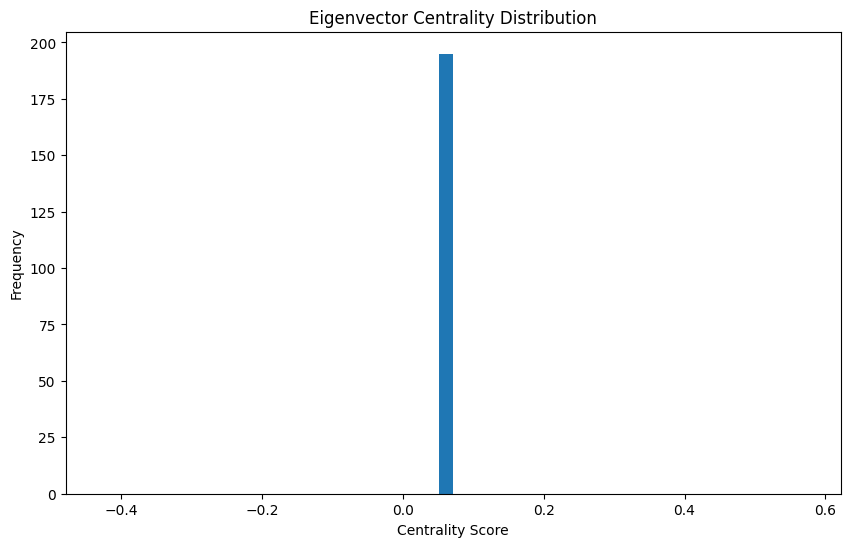

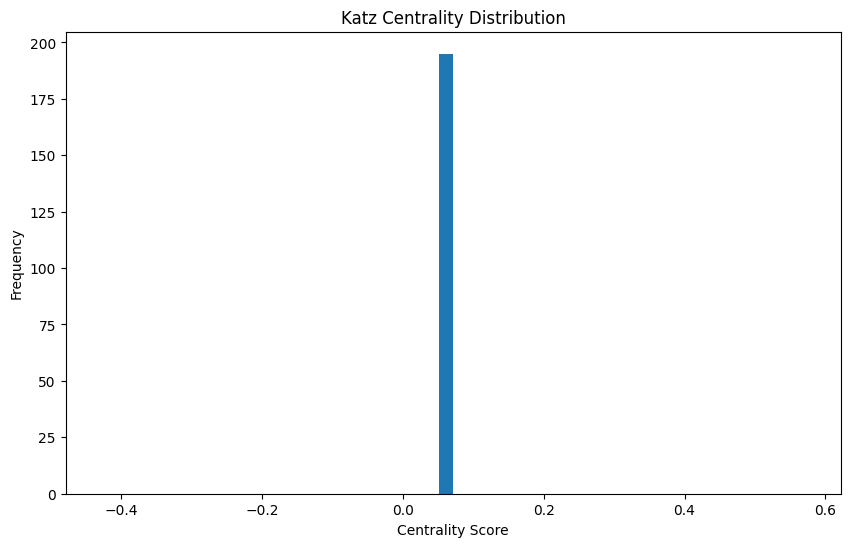

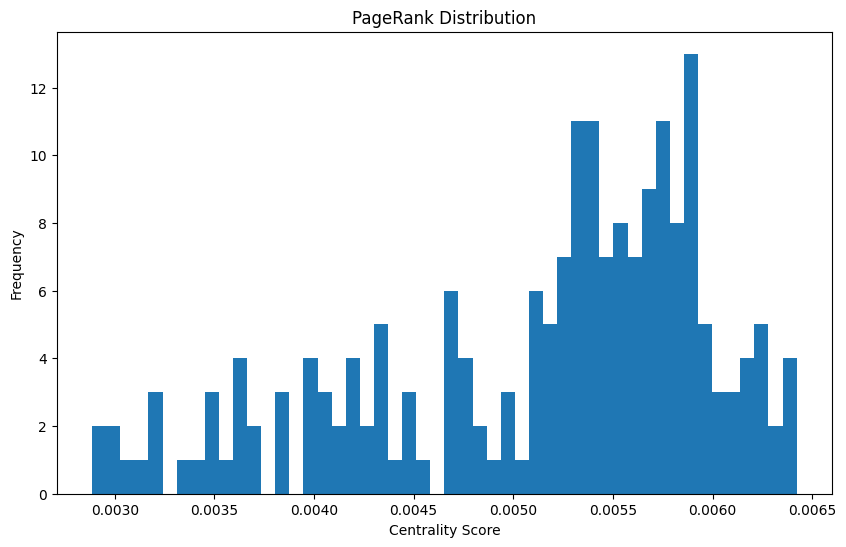

In [ ]:
plot_centrality(eigenvector_centrality, 'Eigenvector Centrality Distribution')
plot_centrality(katz_centrality, 'Katz Centrality Distribution')
plot_centrality(pagerank, 'PageRank Distribution')


Visualisasi Subgraf 20 Lagu Teratas Berdasarkan PageRank

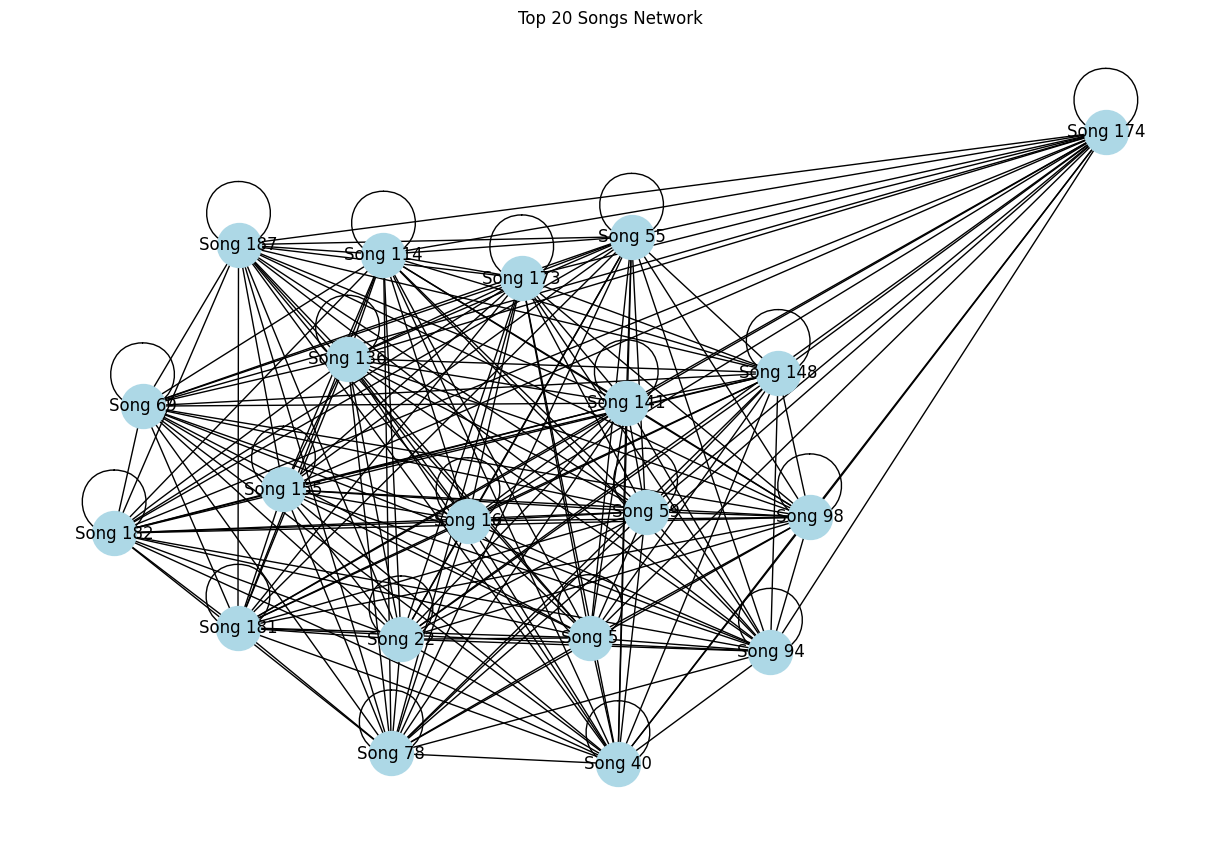

In [ ]:
# Pilih 20 lagu teratas berdasarkan PageRank
top_20_songs = sorted(pagerank, key=pagerank.get, reverse=True)[:20]
subgraph = G.subgraph(top_20_songs)

# Visualisasikan subgraf 20 lagu teratas
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_size=1000, node_color='lightblue', with_labels=False)
nx.draw_networkx_labels(subgraph, pos, {node: f"Song {node}" for node in subgraph.nodes()})
plt.title('Top 20 Songs Network')
plt.axis('off')
plt.show()


**6. Analisis Hasil**

Cetak 10 Lagu Teratas Berdasarkan Centrality

In [ ]:
def print_top_songs(centrality, title):
    top_10 = sorted(centrality, key=centrality.get, reverse=True)[:10]
    print(f"\nTop 10 songs based on {title}:")
    for i, song_id in enumerate(top_10, 1):
        print(f"{i}. Song {song_id}: {centrality[song_id]:.4f}")

# Cetak 10 lagu teratas
print_top_songs(eigenvector_centrality, "Eigenvector Centrality")
print_top_songs(katz_centrality, "Katz Centrality")
print_top_songs(pagerank, "PageRank")



Top 10 songs based on Eigenvector Centrality:
1. Song 0: 0.0716
2. Song 1: 0.0716
3. Song 2: 0.0716
4. Song 3: 0.0716
5. Song 4: 0.0716
6. Song 5: 0.0716
7. Song 6: 0.0716
8. Song 7: 0.0716
9. Song 8: 0.0716
10. Song 9: 0.0716

Top 10 songs based on Katz Centrality:
1. Song 0: 0.0716
2. Song 1: 0.0716
3. Song 2: 0.0716
4. Song 3: 0.0716
5. Song 4: 0.0716
6. Song 5: 0.0716
7. Song 6: 0.0716
8. Song 7: 0.0716
9. Song 8: 0.0716
10. Song 9: 0.0716

Top 10 songs based on PageRank:
1. Song 5: 0.0064
2. Song 141: 0.0064
3. Song 98: 0.0064
4. Song 16: 0.0064
5. Song 181: 0.0063
6. Song 136: 0.0063
7. Song 155: 0.0063
8. Song 55: 0.0062
9. Song 148: 0.0062
10. Song 94: 0.0062


**7. Interpretasi Hasil**

Bandingkan Hasil dari Berbagai Metode Centrality

In [ ]:
import numpy as np

def compare_centrality_methods(eigenvector, katz, pagerank):
    methods = [eigenvector, katz, pagerank]
    method_names = ['Eigenvector', 'Katz', 'PageRank']

    # Ensure that all methods have the same nodes
    all_nodes = set(eigenvector.keys()) & set(katz.keys()) & set(pagerank.keys())

    # Build centrality lists for matching nodes
    for i in range(len(methods)):
        methods[i] = {node: methods[i].get(node, 0) for node in all_nodes}

    # Compare and print correlations
    for i in range(len(methods)):
        for j in range(i+1, len(methods)):
            # Get the lists of values for the current pair of methods
            values_i = list(methods[i].values())
            values_j = list(methods[j].values())

            # Calculate and print correlation
            correlation = np.corrcoef(values_i, values_j)[0, 1]
            print(f"Correlation between {method_names[i]} and {method_names[j]}: {correlation:.4f}")

# Example of usage with dummy centralities
eigenvector_centrality = {'A': 0.1, 'B': 0.2, 'C': 0.3}
katz_centrality = {'A': 0.15, 'B': 0.18, 'C': 0.35}
pagerank = {'A': 0.13, 'B': 0.25, 'C': 0.32}

compare_centrality_methods(eigenvector_centrality, katz_centrality, pagerank)


Correlation between Eigenvector and Katz: 0.9271
Correlation between Eigenvector and PageRank: 0.9887
Correlation between Katz and PageRank: 0.8603


Dalam hasil yang Anda berikan:


1. Eigenvector dan Katz memiliki korelasi sebesar 0,9271.
2. Eigenvector dan PageRank memiliki korelasi yang lebih tinggi yaitu 0,9887.
3. Katz dan PageRank memiliki korelasi sebesar 0,8603.

Interpretasi:
Korelasi antara Eigenvector dan PageRank adalah yang tertinggi yaitu 0.9887, yang menunjukkan bahwa kedua ukuran sentralitas ini adalah yang paling mirip dalam cara mereka memberi peringkat pada simpul dalam jaringan. Hal ini menunjukkan bahwa PageRank dan Eigenvector sangat selaras dalam hal keefektifannya dalam mengukur tingkat kepentingan node, setidaknya untuk data spesifik ini.

Kesimpulan:
PageRank dan Eigenvector kemungkinan merupakan ukuran yang paling akurat atau sebanding untuk jaringan Anda, berdasarkan analisis korelasi ini.
Katz masih berguna tetapi menunjukkan korelasi yang sedikit lebih rendah dengan Eigenvector dan PageRank.

Translated with DeepL.com (free version)